In [292]:
import matplotlib.pyplot as plt
import random
import numpy as np

### Task about lakes:
 - Generate 20 random variable from 1 to 100
 - Draw the plot of the sequence
 - Lets assume each point represent the height and so all plotting is 2d mountains.
 - Then consider the unlimited rain from above - cavities become lakes full of water.
 - Determine the deepest lake

***


The function `find_peaks(heights)` identifies peaks in a given list of terrain heights.

For the input list:  
`[78, 83, 36, 12, 38, 76, 74, 49, 76, 46, 37, 35, 88, 16, 6, 10, 77, 80, 89, 28]` 

Detected Peaks:
- **83** 
- **88** 
- **89**

**Returning Peaks**: The function returns a list of tuples, where:
   - The first element is the height of the peak.
   - The second element is the index in the original list.

`[(83, 1), (88, 12), (89, 18)]`


In [293]:
def find_peaks(heights):
    """Find peaks in the list of heights."""
    lst = [0] + heights + [0]  # Adding zeroes at the beginning and end
    peaks = [] # List to store peaks and their positions
    highest_so_far = 0  # The highest peak found so far

    for x in range(1, len(lst) - 1):
        if lst[x - 1] <= lst[x] >= lst[x + 1]:  # Peak condition
            while peaks and highest_so_far > peaks[-1][0] < lst[x]:
                peaks.pop()
            if lst[x] > highest_so_far:
                highest_so_far = lst[x]
            peaks.append((lst[x], x - 1))  # Adjust index according to the original list
    return peaks


    

The function `find_deepest_lake(heights, peaks)` identifies the **deepest lake** that forms between peaks in a given terrain.

**How It Works:**
1. **Iterating Through Peaks**: The function examines pairs of consecutive peaks.
2. **Defining a Lake**: 
   - A lake forms in the **valley** (lowest section) between two peaks.
   - The depth of the lake is determined by the difference between the **lowest elevation in the valley** and the **minimum of the two peaks**.
3. **Tracking the Deepest Lake**: 
   - The function keeps track of the lake with the maximum depth.
   - If multiple lakes exist, it selects the deepest one.
4. **Returning the Result**:
   - The function returns a list of indices that represent the **lake region**.
   - If no valid lake is found, it returns `None`.

Example:

heights = `[78, 83, 36, 12, 38, 76, 74, 49, 76, 46, 37, 35, 88, 16, 6, 10, 77, 80, 89, 28]`

peaks = `[(83, 1), (88, 12), (89, 18)]`

function will return: `[12, 13, 14, 15, 16, 17, 18]`


In [294]:
def find_deepest_lake(heights, peaks):
    """Finds the deepest lake between peaks."""
    deepest_lake = None
    max_depth = 0

    for i in range(len(peaks) - 1):
        left_peak, left_index = peaks[i]
        right_peak, right_index = peaks[i + 1]
        if right_index - left_index > 1:  # Ensure there is space between the peaks
            min_height = min(left_peak, right_peak)
            lake_segment = heights[left_index + 1:right_index]  # Lake section
            lake_depth = min_height - min(lake_segment)
            if lake_depth > max_depth:
                max_depth = lake_depth
                deepest_lake = (min_height, left_index, right_index, lake_segment)

    if deepest_lake:
        min_height, left_index, right_index, lake_segment = deepest_lake
        return list(range(left_index , right_index+1))  # Return all indices between peaks
    return None  


The function `calculate_lake_depth(heights, indices)` determines the **depth** of the deepest lake in the given terrain.
1. **Finds the left and right peaks** (lake boundaries).
2. **Identifies the lowest point inside** the lake.
3. **Computes the depth** as:

   $$
   \text{Depth} = \text{min height of peaks} - \text{lowest point inside the lake}
   $$
   
Example:

heights = `[78, 83, 36, 12, 38, 76, 74, 49, 76, 46, 37, 35, 88, 16, 6, 10, 77, 80, 89, 28]`

indices = `[12, 13, 14, 15, 16, 17, 18]`

function will return: `82`

In [295]:
def calculate_lake_depth(heights, indices):
    """Calculates the depth of the deepest lake."""
    if not indices or len(indices) < 2:
        return 0   # Return depth 0 if no indices exist
    
    left_index = indices[0]
    right_index = indices[-1]
    
    # Minimum height between left and right peaks
    min_height = min(heights[left_index], heights[right_index])
    
    # Lowest point inside the lake
    min_within = min(heights[left_index + 1:right_index])
    
    # Depth = difference between the minimum elevation and the lowest point of the lake
    lake_depth = min_height - min_within
    
    return lake_depth


The function `visualize_lake(heights, indices)` plots the **terrain** and highlights the **deepest lake**.

In [296]:
def visualize_lake(heights, indices):
    """Visualizes the lake on the plot, where indices are the lake indices"""
    if not indices or len(indices) < 2:
        return  # Do not visualize if there are no indices or less than two
    
    plt.plot(range(len(heights)), heights, color='blue', label='Terrain')
    
    left_index = indices[0]
    right_index = indices[-1]
    lake_segment = heights[left_index:right_index + 1]  
    
    # Highlight the lake in red
    plt.plot(range(left_index, right_index + 1), lake_segment, color='red', linewidth=2, label='Lake')
    
    # Add dashed lines for lake boundaries
    min_height = min(heights[left_index], heights[right_index])
    plt.hlines(min_height, 0, len(heights) - 1, colors='red', linestyles='dashed')
    
    # Add the deepest point of the lake
    min_within = min(lake_segment)
    plt.hlines(min_within, 0, len(heights) - 1, colors='green', linestyles='dashed')
    
    plt.legend()
    plt.show()


The function `generate_random_heights(length=20, min_value=0, max_value=100)` creates a **random sequence of heights**, simulating terrain elevation.

In [297]:
def generate_random_heights(length=20, min_value=0, max_value=100):
    """Generates a random array of integers between min_value and max_value."""
    return [random.randint(min_value, max_value) for _ in range(length)]

Depth of the deepest lake: 90


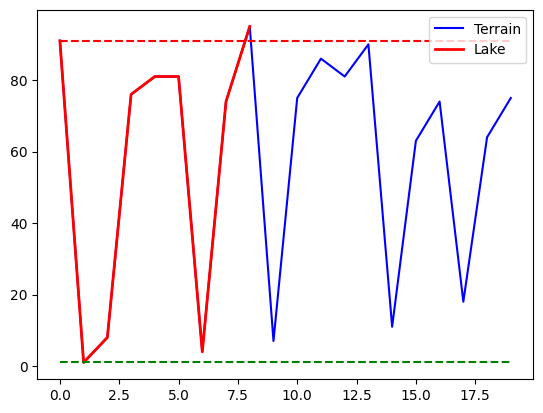

In [344]:
# Generate heights
heights = generate_random_heights()

# Find peaks
peaks = find_peaks(heights)

# Find indices of the deepest lake
deepest_lake_indices = find_deepest_lake(heights, peaks)

# Calculate the depth of the deepest lake
depth_of_deepest_lake = calculate_lake_depth(heights, deepest_lake_indices)

# Print the result
print(f"Depth of the deepest lake: {depth_of_deepest_lake}")

# Visualize the lake
visualize_lake(heights, deepest_lake_indices)